In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from scipy.ndimage import shift
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [3]:
%%time
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28*28) 
X_test = X_test.reshape(-1, 28*28) 

11490434/11490434 [==============================] - 0s 0us/step
CPU times: user 2.96 s, sys: 336 ms, total: 3.3 s
Wall time: 3.44 s


In [ ]:
type(mnist)

sklearn.utils.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist.target[0]

'5'

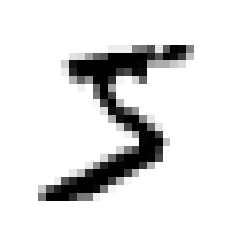

In [ ]:
X, y = mnist['data'], mnist['target']
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

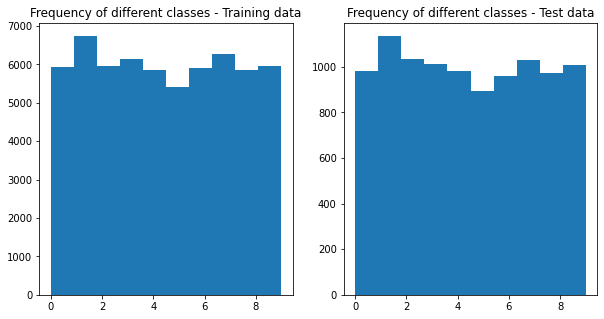

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Test data');

In [ ]:
# Logistic Regression(Lasso regression 적용)

In [8]:
logistic_regression = LogisticRegression(fit_intercept=True,
                        multi_class='ovr',
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )
logistic_regression

LogisticRegression(C=50, multi_class='ovr', n_jobs=5, tol=0.01, verbose=2)

In [9]:
%%time
logistic_regression.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:  1.3min remaining:   33.0s


CPU times: user 796 ms, sys: 455 ms, total: 1.25 s
Wall time: 1min 18s


[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:  1.3min finished


LogisticRegression(C=50, multi_class='ovr', n_jobs=5, tol=0.01, verbose=2)

In [10]:
logistic_regression.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
logistic_regression.coef_.shape

(10, 784)

In [12]:
logistic_regression.intercept_

array([-2.37996043e-03, -4.36897042e-04, -2.04785891e-03, -2.71814956e-03,
       -1.52089882e-03,  7.40370780e-05, -2.89428756e-03, -6.18574149e-04,
       -4.03271629e-03, -1.85664385e-03])

In [34]:
logistic_regression.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [36]:
score = logistic_regression.score(X_test, y_test) # test score
score

0.9181

In [16]:
predictions = logistic_regression.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = logistic_regression.classes_)
cm

array([[ 957,    0,    0,    3,    0,    3,    7,    2,    6,    2],
       [   0, 1117,    3,    1,    0,    1,    4,    1,    7,    1],
       [   6,   12,  907,   19,   10,    5,   10,   11,   49,    3],
       [   3,    0,   19,  915,    2,   23,    4,   11,   26,    7],
       [   1,    2,    4,    3,  910,    0,   12,    2,   11,   37],
       [  11,    2,    1,   37,    9,  762,   16,    6,   40,    8],
       [   7,    3,    7,    2,    4,   17,  909,    1,    8,    0],
       [   2,    6,   23,    4,    8,    1,    1,  947,    5,   31],
       [   9,   14,    7,   23,   12,   26,    7,   11,  854,   11],
       [   8,    6,    2,   13,   33,    3,    0,   25,   16,  903]])

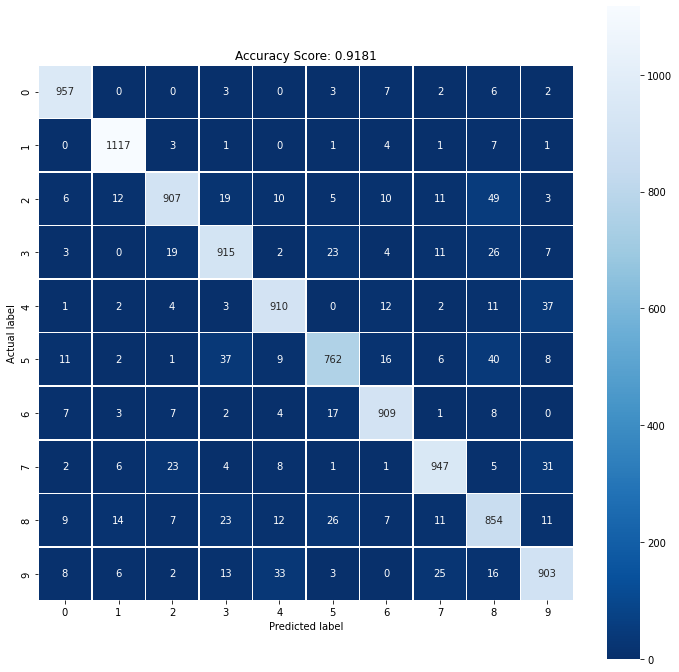

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

In [ ]:
# data preprocessing(Using PCA for dimension reduction)

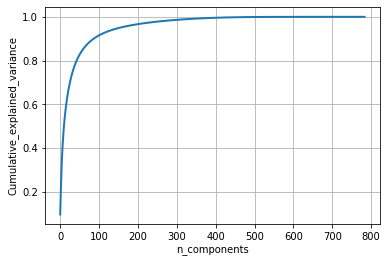

In [ ]:
pca = PCA()
pca.n_components = 784
X_reduced = pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [32]:
X_train_standarded = StandardScaler().fit_transform(X_train)
X_test_standarded = StandardScaler().fit_transform(X_test)

In [21]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train_standarded)

pca.n_components=331
X_test_reduced = pca.fit_transform(X_test_standarded)

In [178]:
X_reduced.shape, X_test_reduced.shape

((60000, 331), (10000, 331))

In [179]:
print('선택한 차원(픽셀) 수 :', pca.n_components_)

선택한 차원(픽셀) 수 : 331


In [22]:
logistic_reg_pca = LogisticRegression(fit_intercept=True,
                        multi_class='ovr',
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )
logistic_reg_pca

LogisticRegression(C=50, multi_class='ovr', n_jobs=5, tol=0.01, verbose=2)

In [23]:
%%time
logistic_reg_pca.fit(X_reduced, y_train)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:   38.9s remaining:   16.7s


CPU times: user 409 ms, sys: 274 ms, total: 683 ms
Wall time: 40 s


[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:   39.8s finished


LogisticRegression(C=50, multi_class='ovr', n_jobs=5, tol=0.01, verbose=2)

In [27]:
print(logistic_reg_pca.predict(X_test_reduced))

[7 3 1 ... 5 7 6]
[7 2 1 0 4 1 4 9 5]


In [30]:
score_reduced = logistic_reg_pca.score(X_test_reduced, y_test) # test score
score_reduced

0.4014

In [ ]:
# Shift image

In [ ]:
# Method to shift the image by given dimension
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train.values]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
    for image, label in zip(X_train.values, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [189]:
%%time
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]


# Training on augmented dataset
lg_clf_for_augmented = LogisticRegression(random_state=42, max_iter=10)
lg_clf_for_augmented.fit(X_train_augmented, y_train_augmented)

# Evaluating the model
y_pred_after_augmented = lg_clf_for_augmented.predict(X_test)
score = accuracy_score(y_test, y_pred_after_augmented)
print("Accuracy score after training on augmented dataset", score)

Accuracy score after training on augmented dataset 0.8929
CPU times: user 55 s, sys: 7.49 s, total: 1min 2s
Wall time: 37.1 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
%%time
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]


# Training on augmented dataset
rf_clf_for_augmented = RandomForestClassifier(random_state=42)
rf_clf_for_augmented.fit(X_train_augmented, y_train_augmented)

# Evaluating the model
y_pred_after_augmented = rf_clf_for_augmented.predict(X_test)
score = accuracy_score(y_test, y_pred_after_augmented)
print("Accuracy score after training on augmented dataset", score)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy score after training on augmented dataset 0.9788
CPU times: user 15min 40s, sys: 4.77 s, total: 15min 45s
Wall time: 15min 57s


In [ ]:
# CNN

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X_train_cnn, y_train_cnn), (X_test_cnn, y_test_cnn) = keras.datasets.mnist.load_data()

# convert class vectors to binary class matrices

# Scale images to the [0, 1] range
X_train_cnn = X_train_cnn.astype("float32") / 255
X_test_cnn = X_test_cnn.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_test_cnn = np.expand_dims(X_test_cnn, -1)
print("X_train shape:", X_train_cnn.shape)

# convert class vectors to binary class matrices
y_train_cnn = keras.utils.to_categorical(y_train_cnn, num_classes)
y_test_cnn = keras.utils.to_categorical(y_test_cnn, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28, 1)


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train_cnn, y_train_cnn, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 47s 109ms/step - loss: 0.3748 - accuracy: 0.8863 - val_loss: 0.0846 - val_accuracy: 0.9765
Epoch 2/15
422/422 [==============================] - 47s 112ms/step - loss: 0.1116 - accuracy: 0.9660 - val_loss: 0.0576 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0838 - accuracy: 0.9745 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 4/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0704 - accuracy: 0.9781 - val_loss: 0.0426 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 46s 110ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0334 - val_ac

In [ ]:
score_cnn = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print("Test loss:", score_cnn[0])
print("Test accuracy:", score_cnn[1])

Test loss: 0.02414536662399769
Test accuracy: 0.9919999837875366
